In [1]:
import numpy as np 
import pandas as pd
import math
from IPython.display import display # Allows the use of display() from DataFrame

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


from sklearn.ensemble import RandomForestRegressor


from sklearn.preprocessing import StandardScaler
from time import time
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.pyplot import *

# Preprocessing the Data in rating.csv: Vai ca format code
def preprocessRatingFile(ratingdata):
    
    # Removing the 'timestamp' field from the ratingdata because I won't use it
    ratingdata=ratingdata.drop('timestamp', axis = 1)  
    df = pd.DataFrame(ratingdata)



    # Getting a unique list of users (movie viewers) ko lap lai
    users = np.unique(df['userId']) 
    print ("\n The total number of unique users in the data is: %i" %np.size(users))



    #Showing a unique sorted list of ratings which range between 0.5 to 5 and go up 0.5
    print ("\n The original ratings in the data before preprocessing: ")
    print(np.unique(ratingdata['rating']))
    print("\n The number of those ratings are: %i "%np.size(np.unique(ratingdata['rating'])))


    print("\n A plot displaying the ratings fro the first 30 record before preprocessing: ")
    fig, ax = subplots()
    df['rating'].head(50).plot(x="record",y="rating",figsize=(12, 6),kind='bar',title="ratings", ax=ax,grid=True,color=np.where(df["rating"]>=3, '#1f77b4', 'r'))
    ax.legend(["dislike"])

    return df, users





 Sample of the data in 'ratings.csv' before preprocessing


,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523



The feature names are:
['userId', 'movieId', 'rating', 'timestamp']


The data types of each feature is as follows:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

 The total number of data rows = 105339

 The total number of features in the data = 4

 The total missing values for each feature: - 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

 The total number of unique users in the data is: 668

 The original ratings in the data before preprocessing: 
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]

 The number of those ratings are: 10 

 A plot displaying the ratings fro the first 30 record before preprocessing: 


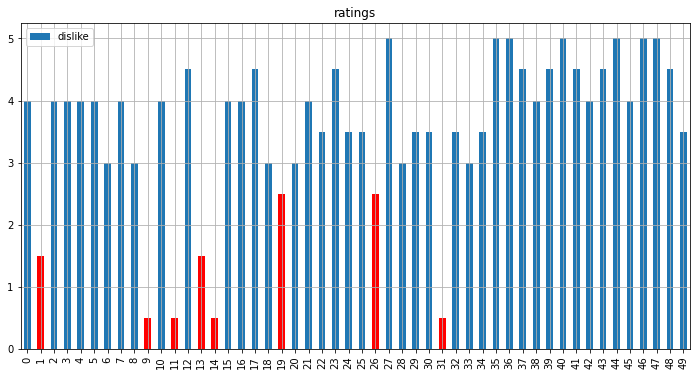

In [3]:
# Data Exploration
# Printing description of the data
# loading the 'ratings' file into ratingdât
ratingdata = pd.read_csv('dataSource/ratings.csv')


# Show an example of records before preprocessing was applied
print ("\n Sample of the data in 'ratings.csv' before preprocessing")
display (ratingdata.head())


#Listing the attribute names
print ("\nThe feature names are:")
print (list(ratingdata))
print ('\n')



# Showing the data types of each colum (data series)
print("The data types of each feature is as follows:")
print(ratingdata.dtypes)

print ("\n The total number of data rows = %i" %(ratingdata.shape[0]))
print ("\n The total number of features in the data = %i" %(ratingdata.shape[1]))



# Total missing values for each feature
print("\n The total missing values for each feature: - ")
print (ratingdata.isnull().sum())

#print(ratingdata.describe())
#Preprocessing the 'rating.csv' file and returning the dataframe after preprocessing and a list of unique users
ratingdata, users = preprocessRatingFile(ratingdata)



 Sample of the data in 'rating.csv' after preprocessing


,userId,movieId,rating
0,1,16,4.0
1,1,24,1.5
2,1,32,4.0
3,1,47,4.0
4,1,50,4.0



 A plot displaying the ratings for the first 30 records after preprocessing: 


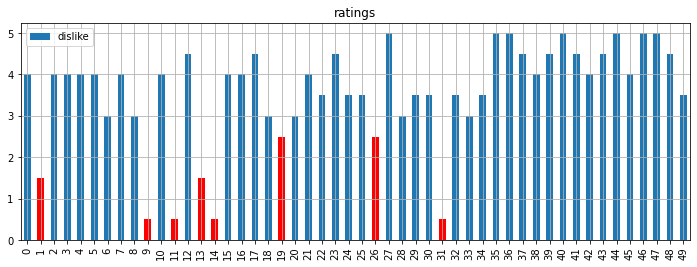

In [4]:
# Showing an example of records in 'ratings.csv' after preprocessing was apply
print ("\n Sample of the data in 'rating.csv' after preprocessing")
display (ratingdata.head())

print ("\n A plot displaying the ratings for the first 30 records after preprocessing: ")
fig, ax = subplots()
ratingdata['rating'].head(50).plot(x="record",y="rating",figsize=(12, 4),kind='bar',ax=ax,title="ratings", legend=True,grid=True,color=np.where(ratingdata["rating"]>=3, '#1f77b4', 'r'))
ax.legend(["dislike"])

In [9]:
def preprocessMovieFile():
    # Load the movies data into moviedata dataFrame
    moviedata = pd.read_csv('dataSource/movies.csv')
    
    title = moviedata['title']
    
    # Printing some descriptions on the movies data
    print ("The total number of movies = %i" %(moviedata.shape[0]))
    print ("\n The total number of features in the data = %i" %(moviedata.shape[1]))
    print ("\n The feature name are:")
    print (list(moviedata))
    
    # Showing the data types of each column (data series)
    print("\n The data types of each feature is as follow: ")
    print( moviedata.dtypes)
    
    print("\n The total missing values for each feature:- ")
    print(moviedata.isnull().sum())
    
    print("\n Sample of the movies data before preprocessing")
    display(moviedata.head())
    
    #Preprocessing Steps:
    
    #1)
    #Extracting the movie name from the title field which if existed is at the end of the value of the field between parenthesis
    #Add a moviename column to the moviedata after extracting it from the 'title'
    moviedata['moviename'] = list(map(lambda x: x[0:x.rfind("(")] if x.rfind("(") > -1 else x, title))
    
    
    #2)
    #Since the title containes a movie name + year of production we need to seperate the year from the name.
    #if a movie doesn't have a year I put a value of '1980'
    
    #count how many movies don't have a production year
    nonyearcount = sum([1 if x.rfind("(") == -1 else 0 for x in title])
    print("\n Number of movies that don't have a production year =", nonyearcount)
    
    
    #5)
    # Extracing the unique different genre values
    genre = moviedata['genres']
    # print (genre)
    genrelist =[]
    for g in genre:
        x=g.split("|")
        for i in x:
            if i not in genrelist:
                genrelist.append(i)
    genrelist.remove('(no genres listed)')            
    print("\nThe different genres for the movies are: ")
    print(genrelist)
    print ("\nThe number of unique genres are:  %i" %np.size(np.unique(genrelist)))

    # Adding 19 columns to the data frame which are the number of unique different genres
    # take note that we can'nt represent the 19 columns with 18 because the genre takes multiple values
    for g in genrelist:
        moviedata[g]=list(map(lambda x: 1 if g in x else 0,moviedata['genres']))
    return moviedata,genrelist

   

In [10]:
# Preprocessing the 'movies.csv' file and returning the 'moviedata' data frame and the unique list of the 19 different genres
moviedata, genrelist = preprocessMovieFile()

# Showing of the moviedata after Preporcessing
print ("\n Sample of the moviedata after preprocessing" )
display (moviedata.head(10))

The total number of movies = 10329

 The total number of features in the data = 3

 The feature name are:
['movieId', 'title', 'genres']

 The data types of each feature is as follow: 
movieId     int64
title      object
genres     object
dtype: object

 The total missing values for each feature:- 
movieId    0
title      0
genres     0
dtype: int64

 Sample of the movies data before preprocessing


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy



 Number of movies that don't have a production year = 0

The different genres for the movies are: 
['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir']

The number of unique genres are:  19

 Sample of the moviedata after preprocessing


,movieId,title,genres,moviename,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Thriller,Horror,Mystery,Sci-Fi,IMAX,War,Musical,Documentary,Western,Film-Noir
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),Action|Crime|Thriller,Heat,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,Sabrina,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,8,Tom and Huck (1995),Adventure|Children,Tom and Huck,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),Action,Sudden Death,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,GoldenEye,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
def Rforest(ratings,RFdata,av):
    
    # Splitting the features and target class into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(RFdata, ratings, test_size=0.2)


    clf = RandomForestRegressor(n_jobs=100,max_features=None) 
    clf.fit(X_train, y_train)
    
    y_pred=clf.predict(X_test)
    print('Root Mean squared Error',np.sqrt(mean_squared_error(y_test, y_pred)))

    
    return X_test, y_pred, y_test

In [17]:

print("Preparing the data for the Random Forest Regressor by joining the two data frames 'ratingdata' and 'moviedata' and displaying only relevant columns")

#DTdata=pd.DataFrame(ratingdata.set_index('movieId').join(moviedata.set_index('movieId')))
RFdata=pd.DataFrame(ratingdata[['userId', 'rating','movieId']].merge(moviedata[[ 'Adventure','Animation','Children','Comedy','Fantasy','Romance','Drama','Action','Crime','Thriller','Horror','Mystery','Sci-Fi','Documentary','IMAX','War','Musical','Western','Film-Noir','movieId']], on='movieId', how='inner'))


ratings=RFdata['rating']

#del RFdata['movieId']
#del RFdata['rating']

RFdata.drop(['movieId','rating'],axis=1, inplace=True)


testD, y_pred, y_test = Rforest(ratings,RFdata,av='micro')
TestDNew = testD.assign(NewRating = y_pred)
TestDold = testD.assign(OldRating = y_test)
result = pd.concat([TestDNew, TestDold, ratingdata['movieId']], axis=1, join="inner")
print(result[['userId','movieId','NewRating','OldRating']])



Preparing the data for the Random Forest Regressor by joining the two data frames 'ratingdata' and 'moviedata' and displaying only relevant columns
Root Mean squared Error 0.9761384682796528
        userId  userId  movieId  NewRating  OldRating
14499        2       2     3916   2.773500        3.0
94163      167     167     1866   4.397423        3.5
7601       242     242    72308   4.061739        4.0
3034       564     564     1246   4.150060        3.0
91337      542     542      741   2.029786        3.5
...        ...     ...      ...        ...        ...
21417      597     597      350   3.196882        5.0
16819       69      69     1097   4.079538        3.5
94297      501     501     4444   3.229965        5.0
64012      331     331     5673   3.075554        4.0
104309     668     668    77266   2.980512        2.5

[21068 rows x 5 columns]
